In [1]:
from textblob.classifiers import DecisionTreeClassifier
from textblob.classifiers import NaiveBayesClassifier
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

### 2.1.1 (3 points) Load one text file: pos_tweets.txt

In [2]:
fo = open("pos_tweets.txt", "r", encoding='utf-8')

In [3]:
mytext = fo.read()

In [4]:
print(mytext) # the original text file has capital I, but the output from the professor has lowercase i. I tried "mytext = fo.read().lower", but that messes other sections below

" I cheer myself up when I'm down by listening to my playlist called, Genius: Ballads and Cellos. I love my iPod and my taste of music."
" just watched the movie Wanted... it was pretty darn good."
" now I'm happy "
"--plotting like i'm mike..'game plan:pass the ball to lebron AT ALL TIMES and DONT FOUL'..certainly we'll win  haha..go cavs goooo!"
"@ mcdonalds with my litto sis aka cuzin lol cristyyyyy "
"@ PBnJen : Thanks for the great tour and making me even more excited to work in PR!  You Rock and so does S"
"@_Chelsea_Marie does target ship things to london? thanks so much! im such a demi fan shes amazing! "
"@adeline_sky  that sounds fantastic! You're amazing! We need to watch some Muse gigs too! Shall we do it Saturday night?"
"@adrianogarcia Ok, tend to use a dongle, but nice to know I could, even nicer to know iPhones can't  "
"@agallerylondon Hi! Great to see your tweet follow. Thanks!  How's the weekends for you?"
"@Alex_Jeffreys Welcome back. Emailed you earlier this mornin

### 2.1.2 (4 points) Tokenize sentence

In [5]:
sentences= nltk.sent_tokenize(mytext)
length= len(sentences)
length
print('# of sentences: ', length)

print(sent_tokenize(mytext))

# of sentences:  749
['" I cheer myself up when I\'m down by listening to my playlist called, Genius: Ballads and Cellos.', 'I love my iPod and my taste of music."', '" just watched the movie Wanted... it was pretty darn good."', '" now I\'m happy "\n"--plotting like i\'m mike..\'game plan:pass the ball to lebron AT ALL TIMES and DONT FOUL\'..certainly we\'ll win  haha..go cavs goooo!"', '"@ mcdonalds with my litto sis aka cuzin lol cristyyyyy "\n"@ PBnJen : Thanks for the great tour and making me even more excited to work in PR!', 'You Rock and so does S"\n"@_Chelsea_Marie does target ship things to london?', 'thanks so much!', 'im such a demi fan shes amazing! "', '"@adeline_sky  that sounds fantastic!', "You're amazing!", 'We need to watch some Muse gigs too!', 'Shall we do it Saturday night?"', '"@adrianogarcia Ok, tend to use a dongle, but nice to know I could, even nicer to know iPhones can\'t  "\n"@agallerylondon Hi!', 'Great to see your tweet follow.', 'Thanks!', 'How\'s the we

### 2.1.3 (5 points) Tokenize words and remove punctuations

In [6]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(mytext)

print('# of words after tokenizing and punctuation removing: ', len(new_words))
print(new_words)

# of words after tokenizing and punctuation removing:  8869
['I', 'cheer', 'myself', 'up', 'when', 'I', 'm', 'down', 'by', 'listening', 'to', 'my', 'playlist', 'called', 'Genius', 'Ballads', 'and', 'Cellos', 'I', 'love', 'my', 'iPod', 'and', 'my', 'taste', 'of', 'music', 'just', 'watched', 'the', 'movie', 'Wanted', 'it', 'was', 'pretty', 'darn', 'good', 'now', 'I', 'm', 'happy', 'plotting', 'like', 'i', 'm', 'mike', 'game', 'plan', 'pass', 'the', 'ball', 'to', 'lebron', 'AT', 'ALL', 'TIMES', 'and', 'DONT', 'FOUL', 'certainly', 'we', 'll', 'win', 'haha', 'go', 'cavs', 'goooo', 'mcdonalds', 'with', 'my', 'litto', 'sis', 'aka', 'cuzin', 'lol', 'cristyyyyy', 'PBnJen', 'Thanks', 'for', 'the', 'great', 'tour', 'and', 'making', 'me', 'even', 'more', 'excited', 'to', 'work', 'in', 'PR', 'You', 'Rock', 'and', 'so', 'does', 'S', '_Chelsea_Marie', 'does', 'target', 'ship', 'things', 'to', 'london', 'thanks', 'so', 'much', 'im', 'such', 'a', 'demi', 'fan', 'shes', 'amazing', 'adeline_sky', 'that',

### 2.1.4 (4 points) Remove stop words

In [7]:
print(stopwords.words('english')) # I retried moving "i" and appending "I" to the stopwords, but that did not work

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
tokens = [token for token in new_words if token not in stopwords.words('english')]
print(tokens)

['I', 'cheer', 'I', 'listening', 'playlist', 'called', 'Genius', 'Ballads', 'Cellos', 'I', 'love', 'iPod', 'taste', 'music', 'watched', 'movie', 'Wanted', 'pretty', 'darn', 'good', 'I', 'happy', 'plotting', 'like', 'mike', 'game', 'plan', 'pass', 'ball', 'lebron', 'AT', 'ALL', 'TIMES', 'DONT', 'FOUL', 'certainly', 'win', 'haha', 'go', 'cavs', 'goooo', 'mcdonalds', 'litto', 'sis', 'aka', 'cuzin', 'lol', 'cristyyyyy', 'PBnJen', 'Thanks', 'great', 'tour', 'making', 'even', 'excited', 'work', 'PR', 'You', 'Rock', 'S', '_Chelsea_Marie', 'target', 'ship', 'things', 'london', 'thanks', 'much', 'im', 'demi', 'fan', 'shes', 'amazing', 'adeline_sky', 'sounds', 'fantastic', 'You', 'amazing', 'We', 'need', 'watch', 'Muse', 'gigs', 'Shall', 'Saturday', 'night', 'adrianogarcia', 'Ok', 'tend', 'use', 'dongle', 'nice', 'know', 'I', 'could', 'even', 'nicer', 'know', 'iPhones', 'agallerylondon', 'Hi', 'Great', 'see', 'tweet', 'follow', 'Thanks', 'How', 'weekends', 'Alex_Jeffreys', 'Welcome', 'back', 'Em

### 2.1.5 (5 points) Calculate the word count or frequency.

In [9]:
freq_dist = nltk.FreqDist(tokens)
print(freq_dist)
print(freq_dist.most_common(20)) # uppercase "I" is messing up the list and by extension the plot of frequency

<FreqDist with 2662 samples and 5682 outcomes>
[('I', 206), ('love', 56), ('good', 44), ('day', 40), ('new', 32), ('see', 30), ('Lakers', 30), ('great', 27), ('get', 27), ('http', 26), ('going', 25), ('got', 25), ('Taylor', 25), ('like', 24), ('go', 24), ('night', 24), ('time', 24), ('Swift', 24), ('today', 23), ('4', 23)]


### 2.1.6 (4 points) Draw a plot of frequency distribution

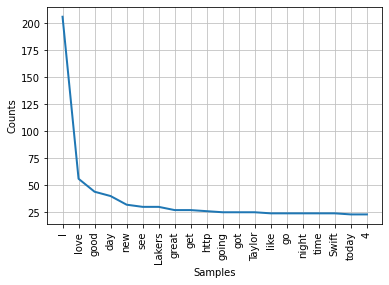

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
freq_dist.plot(20)

### 2.1.7 (5 points) Observe above outputs and plots. What can you find? Please explain

Looking at the most common words, Taylor Swift seems to be very popular. Her first name is mentioned 25 times and her last name 24 times. One could also guess that "going", "go", "love", "see", have something to do with her. Could be fans wanting to attend her concerts

### 2.2.1 (10 points) Load two datasets.

In [16]:
postiveTweet = TextBlob("pos_tweets.txt")
print(postiveTweet)

pos_tweets.txt


### 3.1 (10 points) What lessons have you learnt when you implement Task 2? Note that you must describe your findings based on your own experience during the implementation.

### 3.2 (10 points) Based on your experience with text mining in these assignments, compare with text data processing and numeric data processing

### Text Data Processing
* Data processing for turning unstructured textual into structured data (emails, social media conversations, chats), then looking for insights
* Requires extra steps to achieve the same objective as numeric data processing
* Requires over-riding taxonomy for data to be organized into a common framework
* Requires "stopwords" during data cleaning stage

### Numeric Data Processing
* Data processing that searchings for patterns and meaning in structured and unstructured big data
* Data can come from sources such as databases, excel, etc
* 

### 3.3 With the ever-increasing use of web and social-media data, data scientists must often perform text mining or Natural Language Processing (NLP). Define and describe NLP. List three NLP applications, providing real-world examples of each.

### Definition and Description of NLP
* Natural Language Process (NLP), involves computers simulating how humans understand natural language such as English

* Common sub-tasks involves summarization, part-of-Speech (PoS) tagging, text categorization, and sentiment analysis


### NLP Application
* Healthcare: Used for clustering medical research by extracting valuable information
* Spam Filtering: Used to filter and prevent certain emails from reaching the intended audience
* Risk Management: Looks for trends and extracting information for financial decisions

### Real World Examples
* Programs like Microsoft Outlook utilize NLP for filtering and flagging harmful informations and emails like spams and viruses

### References 
https://blog.hyperiondev.com/index.php/2018/01/15/nlp-tutorial-python-natural-language-processing/
https://www.educba.com/data-mining-vs-text-mining/
https://blogs.opentext.com/whats-the-difference-between-data-mining-and-text-mining/
https://www.ibm.com/cloud/learn/text-mining